# <center> Lab 6 Examples 
## <center>    Riemann Sums and Integrals
    
In this lab most questions will be about Riemann sums. We will want to have an efficient way to plot them and calculate them. To achieve this we will create a separate subroutine (function `def`) and then use it multiple times as needed. Try to understand each step of the subroutine because in the lab you will be asked to change it a little bit.

**Video**: https://youtu.be/bfwKbNuRoBM
    
We start with importing needed libraries. We will use NumPy, SymPy and Matlplotlib.

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from numpy.polynomial import *


sp.var('x')

x

Now we will create two subroutines. They will take as input end points of interval $a$ and $b$, the number of subintervals $N$ and the function $f$ (*Note: The order of inputs matters*). One subroutine will plot Riemman sum using left endpoints and calculate their area. And the other will use right end points.

First is the left Riemann sums. Take note of `bar` command. Here some explanations for it:

First two inputs are points which we use to determine the height of bar chart.
The third input is width of each bar. If we make width negative it will flip the bar with respect first input. This will be helpful when we are trying to use right end points. 
Finally `align`, tells us whether the first input is an end point of each bar. If you skip `align`, then first input will be considered to be a mid-point.

In [2]:
def LeftBox(a,b,N,f):
    
#Setup

    delx=(b-a)/N                   # this is delta x            
    x = np.linspace(a,b,N+1)       # these are x_i's
    X = np.linspace(a,b,1000)      # X and Y are for plotting the graph
    Y = f(X)
    
    x_left = x[:-1]                # Left endpoints (we basically removed right most point)
    y_left = f(x_left)             
    area=np.sum(y_left)*delx
    
#Plot

    fig=plt.figure()
    plt.plot(X,Y,'b')            # plot the function
    plt.plot(x_left,y_left,'b.',markersize=10)   # plots points on the graph that we use as height of each bar
    plt.bar(x_left,y_left,width=delx,alpha=0.2,align='edge',edgecolor='b')   # bar chart 
    plt.title('Left Riemann Sum, N = {}'.format(N))
    plt.show()
    
    print("Area = ", area)     # print calculated area

Now the right one:

In [3]:
def RightBox(a,b,N,f):  
    delx=(b-a)/N
    x = np.linspace(a,b,N+1)
    X = np.linspace(a,b,1000)
    Y = f(X)
    
    x_right = x[1:]           # Right endpoints (we removed the first point)
    y_right = f(x_right)
    area=np.sum(y_right)*delx
    
    fig=plt.figure()
    plt.plot(X,Y,'b')
    plt.plot(x_right,y_right,'b.',markersize=10)
    plt.bar(x_right,y_right,width=-delx,alpha=0.2,align='edge',edgecolor='b')   # note that width is negative
    plt.title('Right Riemann Sum, N = {}'.format(N))
    plt.show()
    
    print("Area = ", area)

Let's check how they work. We will use $f(x)=-x^2+x$ and interval $[0,1]$. We will use $N=8$ in this example. First is the Left Riemman sum:

In [4]:
f=-x**2+x
fn=sp.lambdify(x,f)

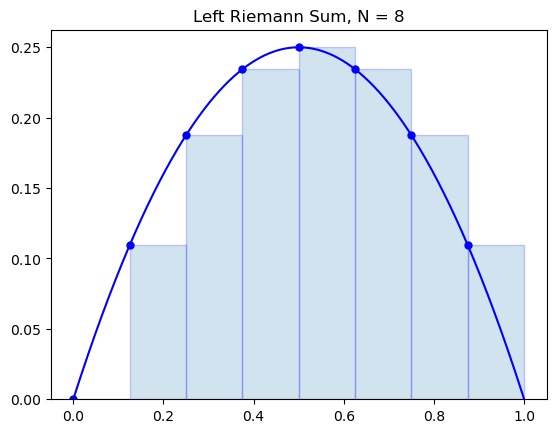

Area =  0.1640625


In [5]:
LeftBox(0,1,8,fn)   # Reminder that the order of inputs matters

And now the right one:

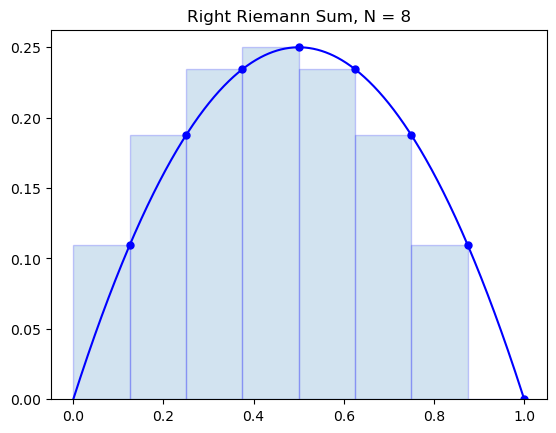

Area =  0.1640625


In [6]:
RightBox(0,1,8,fn)

As one more example, let's see what we get if $N=100$:

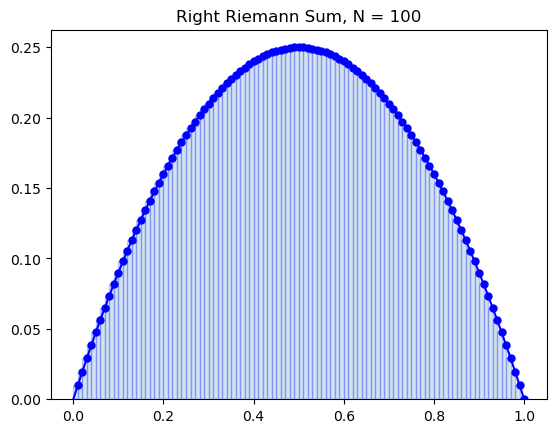

Area =  0.16665


In [7]:
RightBox(0,1,100,fn)

We can also compute integrals directly using SymPy. Note that we shold use SymPy functions to do so. For example, let's find $\int_0^1f(x)dx$. (Sidenote: if you remove `0,1` from below command, you will get indefinite integral)

In [8]:
sp.integrate(f, (x, 0, 1))

1/6

Sometimes, it might be useful to also `N` function. This is especially important if you need your answer to be in the decimal form or your integrant is too complicated and you need a good approximation.

In [9]:
sp.N(sp.integrate(f, (x, 0, 1)))

0.166666666666667

Finally, our polynomial class from NumPy also has built-in integration that produces antiderivative.

In [10]:
poly=Polynomial([0,1,-1])
poly

Polynomial([ 0.,  1., -1.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [11]:
antid=poly.integ()
antid

Polynomial([ 0.        ,  0.        ,  0.5       , -0.33333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

If we need to find definite integral, you would have to use Fundamental Theorem of Calculus. For example, for $\int_0^1f(x)dx$ we have

In [12]:
antid(1)-antid(0)

0.16666666666666669